# Monty Hall Problem

### Simulating three doors: one car, and two goats

* 1 = car
* 0 = goat

Initializing a vector of Doors with just goats, randomly choosing the index of the door containing a car, and update the vector.

In [1]:
import random
import numpy as np

Doors=np.zeros(3)

index = random.choice([0,1,2])
#print(index)
Doors[index] = 1
    
print ("Scheme of the doors: " + str(Doors))

#del Doors[0] #per eliminare la porta scelta
#print (Doors)

Scheme of the doors: [0. 1. 0.]


#### Kind of players:
* Conservative: he never changes the door
* Switcher: he always changes the door
* Newcomer: he arrives late to the game when the almost all doors have been opened

In [2]:
#Player one: conservative

print("Conservative")
Choice_1 = random.choice([0,1,2])
print("He chose the " + str(Choice_1 + 1) + " door")

if Choice_1 == index:
    print("Result: Win")
else:
    print("Result: Goat")

Conservative
He chose the 1 door
Result: Goat


In [3]:
#Player two: switcher

print("Switcher")
Choice_2_1 = random.choice([0,1,2])
print("He chose the " + str(Choice_2_1 + 1) + " door")

if Choice_2_1 == index:
    print("Result: Goat")
else:
    print("Result: Win")

Switcher
He chose the 1 door
Result: Win


In [4]:
#Player three: newcomer

print("Newcomer")

index_fail = 0 #index of a door with a goat
for i in range(3):
    if Doors[i] == 0:
        index_fail = i
        break;
#print(index_fail)
Choice_3 = random.choice([index, index_fail ])
print("He chose the " + str(Choice_3 + 1) + " door")

if Choice_3 == index:
    print("Result: Win")
else:
    print("Result: Goat")

Newcomer
He chose the 1 door
Result: Goat


#### Repeating the game many times

In [5]:
#function that simulates the game for the conservative player

def first_player(num_doors):
    index = random.randrange(0, num_doors)
    Choice_1 = random.randrange(0, num_doors)
    if Choice_1 == index:
        return 1
    else: 
        return 0

In [6]:
#function that simulates the game for the switcher player

def second_player(num_doors):
    index = random.randrange(0, num_doors)
    Choice_2 = random.randrange(0, num_doors)
    if Choice_2 == index:
        return 0
    else: 
        return 1

In [7]:
#functions that simulates the game for the newcomer player

def third_player(num_doors):
    #index_fail = 0
    Doors=np.zeros(num_doors)
    index = random.randrange(0, num_doors)
    Doors[index] = 1
    for i in range(num_doors):
        if Doors[i] == 0:
            index_fail = i
            break;
    Choice_3 = random.choice([index,index_fail])
    if Choice_3 == index:
        return 1
    else: 
        return 0

In [8]:
n = 1000000 #number of games

results1=np.zeros(n)
results2=np.zeros(n)
results3=np.zeros(n)

for h in range (n):
    results1[h] = first_player(3) #doing only three doors
    results2[h] = second_player(3)
    results3[h] = third_player(3)

print("Probability of the conservative player " + str(round((np.sum(results1))/n,3)))
print("Probability of the switcher player " + str(round((np.sum(results2))/n,3)))
print("Probability of the newcomer player " + str(round((np.sum(results3))/n,3)))

Probability of the conservative player 0.334
Probability of the switcher player 0.666
Probability of the newcomer player 0.5


#### It's advantageous to be the switcher player

### New rules: 100 doors and 98 get opened

In [9]:
n = 1000000 #number of game

Resu1=np.zeros(n)
Resu2=np.zeros(n)
Resu3=np.zeros(n)

for h in range (n):
    Resu1[h] = first_player(100)
    Resu2[h] = second_player(100)
    Resu3[h] = third_player(100)
    
print("Winning probability of the conservative player " + str(round((np.sum(Resu1))/n,4)))
print("Winning probability of the switcher player " + str(round((np.sum(Resu2))/n,4)))
print("Winning probability of the newcomer player " + str(round((np.sum(Resu3))/n,4)))

Winning probability of the conservative player 0.0101
Winning probability of the switcher player 0.9901
Winning probability of the newcomer player 0.4998


#### It's still advantageous to be the switcher player

### New rules: $N$ doors and $M \le N-2$ gets opened

#### Conservative player: 
* $N$ doors and $M = N - 2$ gets opened

  0%|          | 0/98 [00:00<?, ?it/s]

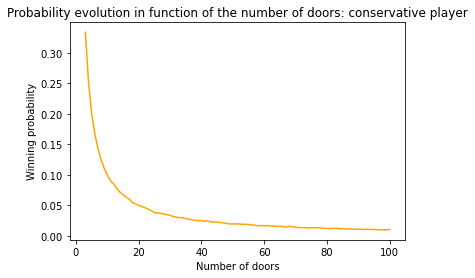

In [10]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from matplotlib import colors

n = 100000 #number of game
N = 100 #maximum number of doors

R1 = np.zeros(n)

P1 = np.zeros(N-2) #Probability array
j=3 #the doors can't be less than three
for u in tqdm(range (N-2)):
    for h in range (n):
        R1[h] = first_player(j)
    #print (R1)
    #print(np.sum(R1))
    j = j + 1
    P1[u] = (np.sum(R1))/n
#print(P1)

plt.plot(np.arange(3,N+1), P1, color='orange')
plt.title('Probability evolution in function of the number of doors: conservative player')
plt.xlabel('Number of doors')
plt.ylabel('Winning probability')
plt.show()

* $N$ doors and $M \le N - 2$ gets opened

In [11]:
# no logical changes since he conserves his first choice

M1=np.zeros((98,98)) #probability matrix
l=0
for l in tqdm(range(98)):
    for u in range (N-2):
        if(u>l-1):
            M1[l][u]=P1[u]

#print(M1)

  0%|          | 0/98 [00:00<?, ?it/s]

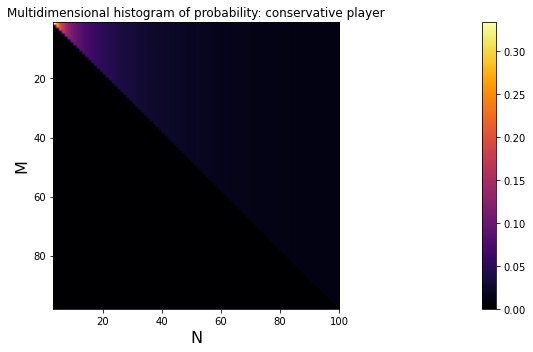

In [12]:
extent=[3,N,N-2,1]
fig=plt.figure(1, figsize=(40,5), tight_layout=True)
plt.imshow(M1, extent=extent, cmap='inferno')
plt.xlabel('N', fontsize=16)
plt.ylabel('M', fontsize=16)
plt.title('Multidimensional histogram of probability: conservative player')
plt.colorbar()
plt.show()

#### Switcher player: 
* $N$ doors and $M \le N - 2$ gets opened

In [13]:
def Second(num_doors, n_open):
    index = random.randrange(0, num_doors)
    Choice_2 = random.randrange(0, num_doors)
    if Choice_2 == index:
        return 0
    else: 
        index_2 = random.randrange(0, (num_doors-n_open-1))
        Choice_2_2 = random.randrange(0, (num_doors-n_open-1)) #the player is making another choice
        if Choice_2_2 == index_2:
            return 1
        else:
            return 0
        

In [14]:
n = 10000 #number of game
N = 100 #maximum number of doors
M = N - 2 #maximum numbers of doors that get opened

R2=np.zeros(n)
P2 = np.zeros(N-2) #probability array
M2=np.zeros((N-2,N-2))
j=3
s=1

for e in tqdm(range(N-2)):
    for u in range (N-2):
        for h in range (n):
            R2[h] = Second(j, s)
        #print (R1)
        #print(np.sum(R1))
        j = j + 1
        if(u>s-2): #to avoid case such 6 doors and 7 opened
            M2[e][u] = (np.sum(R2))/n
    #print(M2[e])
    s = s + 1
    j= s+2
    
        
#print(M2)


  0%|          | 0/98 [00:00<?, ?it/s]

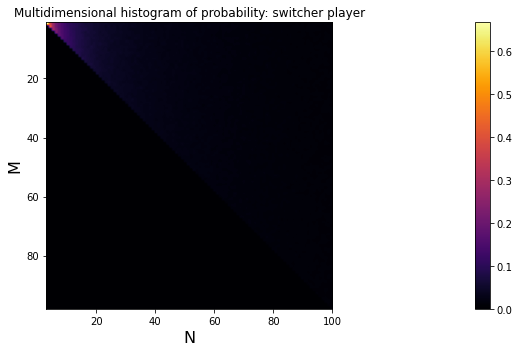

In [15]:
extent=[3,N,N-2,1]
fig=plt.figure(1, figsize=(40,5), tight_layout=True)
plt.imshow(M2, extent=extent, cmap='inferno')
plt.xlabel('N', fontsize=16)
plt.ylabel('M', fontsize=16)
plt.title('Multidimensional histogram of probability: switcher player')
plt.colorbar()
plt.show()